## **Linear Regression** :

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Problem Statement :- What will be predicted score if a student studies for 9.25 hrs/ day?

### Author: Saurabh Prashant Nagvekar.

### Task:01 - Predict the percentage of an student based on the no. of study hours.

#### Source of data :  http://bit.ly/w-data

## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

# import train_test_split
from sklearn.model_selection import train_test_split

# import stats
from scipy import stats

# import evaluation metrics for the model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import feature selection functions
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import sequential_feature_selector as sfs

# import cross validation function
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

# plotting parameters
plt.rcParams["figure.figsize"] = [15,8]

## Data Exploration

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.sample(5)

,Hours,Scores
1,5.1,47
0,2.5,21
17,1.9,24
16,2.5,30
15,8.9,95


## Understanding the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [6]:
df.nunique()

Hours     23
Scores    23
dtype: int64

## Checking for any Null values.

In [7]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

**From above, we can observe that there are null values present in the data**

## Visualisation

### Checking the distribution with Distplot

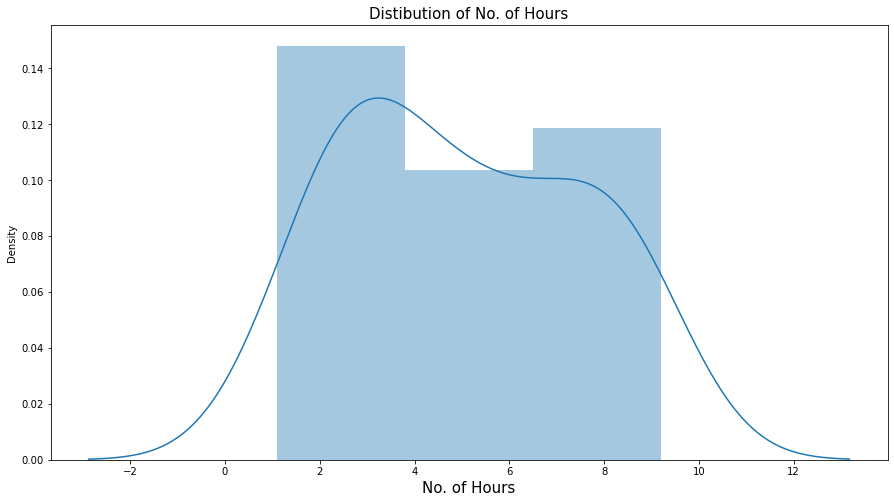

In [8]:
sns.distplot(df["Hours"])
plt.title("Distibution of No. of Hours",fontsize=15)
plt.xlabel("No. of Hours",fontsize=15)
plt.show()

**From the above plot, we can observe that Data is normally distributed.**

### Plotting the relation between No. of Hours of Study and Percentage Scores and also checking the Correlation

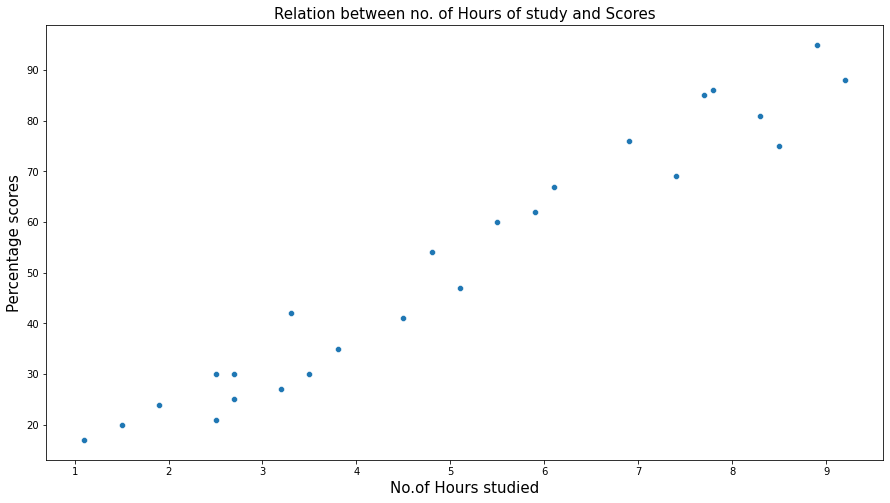

In [9]:
sns.scatterplot(x = df["Hours"], y = df["Scores"])
plt.title("Relation between no. of Hours of study and Scores",fontsize=15)
plt.xlabel("No.of Hours studied",fontsize=15)
plt.ylabel("Percentage scores",fontsize=15)
plt.show()

**From the above plot, we can observed that No. of Hours studied and Percentage score by student has a Positive and Strong linear relation**

In [10]:
corr = df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


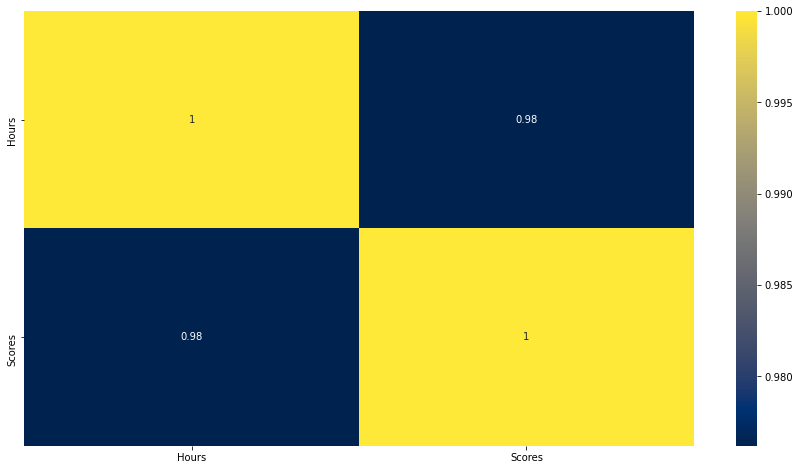

In [11]:
sns.heatmap(corr,annot=True,cmap='cividis')
plt.show()

**From the above plot, we can observed that No.of Hours and Percantage has a Strong Correlation between them.**

### Preparing the Data

In [12]:
X = df.iloc[:,0].values
y = df.iloc[:,-1].values
X = X.reshape(-1,1)
y = y.reshape(-1,1)

### Splitting the Data with Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (20, 1)
Shape of X_test: (5, 1)
Shape of y_train: (20, 1)
Shape of y_test: (5, 1)


### Training the Model

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### Fitting the Model

In [15]:
model = lr.fit(X_train,y_train)

### Predicting the Model

In [16]:
print("X test:",'\n',X_test,'\n')
print("Predicted Model:",'\n',model.predict(X_test))

X test: 
 [[3.8]
 [4.8]
 [2.5]
 [1.9]
 [4.5]] 

Predicted Model: 
 [[39.49078536]
 [49.33934803]
 [26.68765389]
 [20.77851629]
 [46.38477923]]


In [17]:
y_pred = model.predict(X_test)

### Plotting the Regression Line on Training set

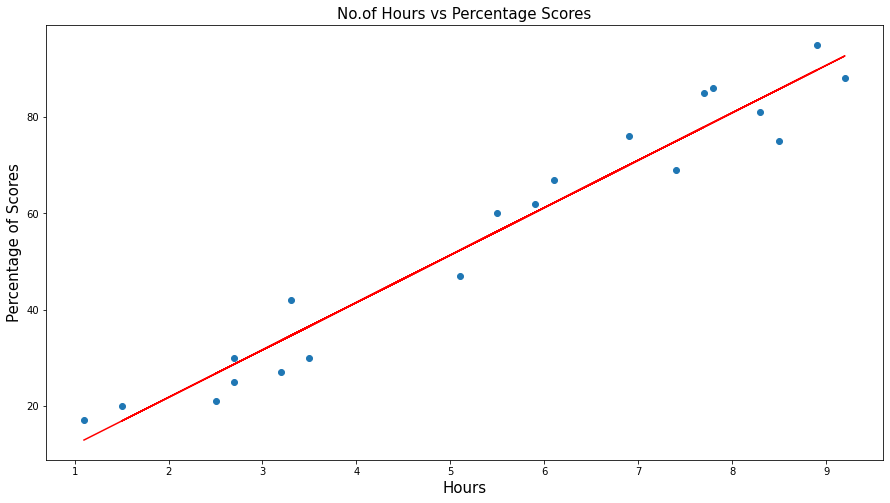

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train, model.predict(X_train),color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Percentage of Scores",fontsize=15)
plt.title("No.of Hours vs Percentage Scores",fontsize=15)
plt.show()

### Evaluating the Model

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.214009275064578


**Mean absolute error is 5.98, therefore MAE tell us that the average error is less in the model.**

In [20]:
from sklearn import metrics  
print('Root Mean Squared Error on test data:', np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error on test data: 4.294980123331068


**Root mean squared error for test data is 6.47, therefore RMSE tells us the model is good at predicting observed data.**

In [21]:
from sklearn import metrics
print("Rsqaured score:",r2_score(y_test,y_pred))

Rsqaured score: 0.8249159618469157


**The Rsquared value is 92.96%. hence, regression model is better fit.**

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [23]:
hours = np.array(9.25)
hours = hours.reshape(-1,1)
score_predicted = model.predict(hours)
print("If a student studies for 9.25 hours, he is expected to score:",round(score_predicted[0][0],2),'%')

If a student studies for 9.25 hours, he is expected to score: 93.17 %
